This dataset has the tweets from an airline company. Perform the following activities given the above dataset
1. Build a classification model using the airline_sentiment column as the target variable and use the “text” column as the input text for the model
2. Perform the following preprocessing
    * a. Clean the text
    * b. Create Document term matrix using the TFIDFVectorizer
    * c. Add additional variables or features from the dataset to improve the performance
    * d. Perform lemmatisation or any other form of text cleansing
    * e. Create a feature that counts the number of punctuation marks per each sentence
    * f. Create a feature that counts the length of each tweet
3. Compute metrics such as precision recall and classification for all the three classes
4. Build a feed forward neural network that can perform multi class classification

# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import string

import warnings
warnings.filterwarnings('ignore')


# Reading the tweets

In [2]:
data = pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Creating a tweets dataframe for text and sentiment

In [4]:
tweets = data[['text','airline_sentiment']]

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


Distribution of Tweets sentiments

<AxesSubplot: >

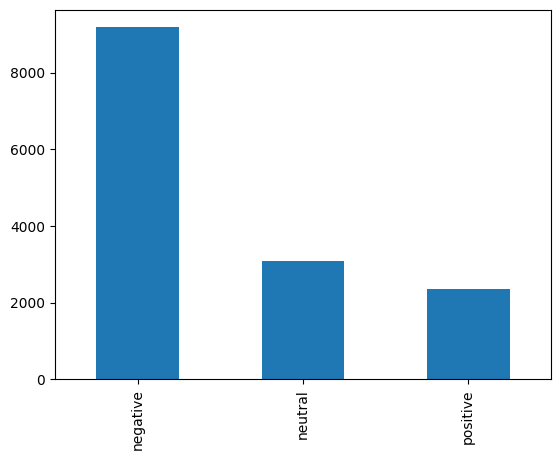

In [6]:
tweets.airline_sentiment.value_counts().plot(kind = 'bar')

Cleaning the text 
* Removing the mentions
* Removing the #
* Removing links

In [7]:
tweets['text_clean'] = tweets['text'].apply(lambda x : re.sub(r'\@\w*','',x))
tweets['text_clean'] = tweets['text_clean'].apply(lambda x : re.sub(r'\#','',x))
tweets['text_clean'] = tweets['text_clean'].apply(lambda x : re.sub(r'https?:\/\/.*\/\w*','',x))

In [8]:
tweets.head()

,text,airline_sentiment,text_clean
0,@VirginAmerica What @dhepburn said.,neutral,What said.
1,@VirginAmerica plus you've added commercials t...,positive,plus you've added commercials to the experien...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,I didn't today... Must mean I need to take an...
3,@VirginAmerica it's really aggressive to blast...,negative,"it's really aggressive to blast obnoxious ""en..."
4,@VirginAmerica and it's a really big bad thing...,negative,and it's a really big bad thing about it


Creating features :
* Punctuation Count
* Word Count

In [9]:

nlp = spacy.load("en_core_web_sm")


def punctuation_count(sent):
    count = 0
    doc = nlp(sent)
    for token in doc:
        if token.lemma_ in string.punctuation:
            count+=1
    return count

def word_count(sent):
    count = 0
    doc = nlp(sent)
    for token in doc:
        if token.lemma_ != " ":
            count+=1
    return count




In [10]:
tweets['Punctuation_count'] = tweets.text.apply(lambda x : punctuation_count(x))

In [11]:
tweets['word_count'] = tweets.text.apply(lambda x : word_count(x))

In [12]:
def clean_doc(sent):
    doc = nlp(sent)
    lemma_out = [token.lemma_ for token in doc]
    lemma_out = " ".join(lemma_out)
    return lemma_out

tweets["text_clean"] = tweets.text_clean.apply(lambda x: clean_doc(x))

In [13]:
tweets

,text,airline_sentiment,text_clean,Punctuation_count,word_count
0,@VirginAmerica What @dhepburn said.,neutral,what say .,1,5
1,@VirginAmerica plus you've added commercials t...,positive,plus you 've add commercial to the experienc...,1,12
2,@VirginAmerica I didn't today... Must mean I n...,neutral,I do not today ... must mean I need to take ...,1,15
3,@VirginAmerica it's really aggressive to blast...,negative,"it be really aggressive to blast obnoxious ""...",5,23
4,@VirginAmerica and it's a really big bad thing...,negative,and it be a really big bad thing about it,0,11
...,...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,thank you we get on a different flight to Ch...,1,12
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,leave over 20 minute Late Flight . no warnin...,2,26
14637,@AmericanAir Please bring American Airlines to...,neutral,please bring American Airlines to blackberry10,1,8
14638,"@AmericanAir you have my money, you change my ...",negative,"you have my money , you change my flight , a...",5,29


# TFIDF Vector

In [14]:
vec = TfidfVectorizer(stop_words='english')


In [15]:
vectorized_data = vec.fit_transform(tweets["text_clean"])

In [16]:
result = pd.DataFrame(
    data=vectorized_data.toarray(),  
    columns=vec.get_feature_names_out()
)
result

,00,000,000114,000419,000lbs,0011,0016,00a,00am,00p,...,zfv,zig,zip,zipper,zombie,zone,zoom,zrh,zuke,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
result

,00,000,000114,000419,000lbs,0011,0016,00a,00am,00p,...,zfv,zig,zip,zipper,zombie,zone,zoom,zrh,zuke,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dropping features that are just numbers

In [18]:
columns_num = []
for column in result.columns:
    if column.isdigit():
        columns_num.append(column)


In [19]:
result.drop(columns_num,inplace = True,axis=1)
result

,000lbs,00a,00am,00p,00pm,01pm,05am,05pm,07p,0_0,...,zfv,zig,zip,zipper,zombie,zone,zoom,zrh,zuke,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Random Forest Classifier on data with Features excluding numbers

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result, tweets["airline_sentiment"], test_size=0.3)


## Model Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

    negative       0.77      0.91      0.84      2739
     neutral       0.60      0.41      0.49       923
    positive       0.75      0.53      0.62       730

    accuracy                           0.75      4392
   macro avg       0.71      0.62      0.65      4392
weighted avg       0.73      0.75      0.73      4392



In [21]:
preds

array(['neutral', 'negative', 'negative', ..., 'neutral', 'negative',
       'negative'], dtype=object)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.7454462659380692

Random Forest Classifier on data with Features including numbers

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, tweets["airline_sentiment"], test_size=0.3)


## Model Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

    negative       0.78      0.92      0.84      2725
     neutral       0.61      0.43      0.50       952
    positive       0.74      0.55      0.63       715

    accuracy                           0.75      4392
   macro avg       0.71      0.63      0.66      4392
weighted avg       0.74      0.75      0.74      4392



In [24]:
accuracy_score(y_test,preds)

0.7509107468123861

Deep Neural Network

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [26]:
y = pd.get_dummies(tweets["airline_sentiment"])
X_train, X_test, y_train, y_test = train_test_split(result, y, test_size=0.1)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.1)


In [27]:
ANN_model = Sequential()
ANN_model.add(Input(result.shape[1]))
ANN_model.add(Dense(50,activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(3,activation = 'softmax'))


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-01-06 22:20:58.677056: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-06 22:20:58.679153: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [28]:
ANN_model.compile(metrics='accuracy',loss='categorical_crossentropy',optimizer=Adam(learning_rate= 0.0001))

In [29]:
es = EarlyStopping(monitor='val_loss',patience=2,mode='min')

In [30]:
ANN_model.fit(x = X_train,y = y_train,epochs = 25,validation_data=(X_test,y_test),callbacks=[es])

Epoch 1/25


2023-01-06 22:21:10.640930: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-06 22:21:11.345098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


411/412 [============================>.] - ETA: 0s - loss: 1.0289 - accuracy: 0.6114

2023-01-06 22:21:15.393278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


412/412 [==============================] - 5s 10ms/step - loss: 1.0288 - accuracy: 0.6115 - val_loss: 0.9552 - val_accuracy: 0.6196
Epoch 2/25
412/412 [==============================] - 4s 9ms/step - loss: 0.8922 - accuracy: 0.6271 - val_loss: 0.8576 - val_accuracy: 0.6196
Epoch 3/25
412/412 [==============================] - 4s 9ms/step - loss: 0.8148 - accuracy: 0.6361 - val_loss: 0.7979 - val_accuracy: 0.6401
Epoch 4/25
412/412 [==============================] - 4s 9ms/step - loss: 0.7531 - accuracy: 0.6556 - val_loss: 0.7450 - val_accuracy: 0.6614
Epoch 5/25
412/412 [==============================] - 4s 9ms/step - loss: 0.6979 - accuracy: 0.6866 - val_loss: 0.7018 - val_accuracy: 0.6887
Epoch 6/25
412/412 [==============================] - 4s 9ms/step - loss: 0.6507 - accuracy: 0.7184 - val_loss: 0.6668 - val_accuracy: 0.7160
Epoch 7/25
412/412 [==============================] - 4s 9ms/step - loss: 0.6102 - accuracy: 0.7552 - val_loss: 0.6391 - val_accuracy: 0.7426
Epoch 8/25
412/4

In [31]:
pred = ANN_model.predict(X_val)
ANN_model.evaluate(X_val,y_val)

5/5 [==============================] - 0s 10ms/step - loss: 0.5520 - accuracy: 0.7687


2023-01-06 22:23:03.791837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.5519933700561523, 0.7687074542045593]

In [34]:
str = "I am very happy that my assignment is complete"
str = clean_doc(str)
str = vec.transform([str]) 

In [35]:
test_str = pd.DataFrame(
    data=str.toarray(),  
    columns=vec.get_feature_names_out()
)
test_str.drop(columns_num,inplace = True,axis=1)
test_str

,000lbs,00a,00am,00p,00pm,01pm,05am,05pm,07p,0_0,...,zfv,zig,zip,zipper,zombie,zone,zoom,zrh,zuke,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
classes = list(y.columns)
sentiments = ANN_model.predict(test_str)
classes[np.argmax(sentiments)]

1/1 [==============================] - 0s 30ms/step


'positive'

In [37]:
clf.predict(str)

array(['positive'], dtype=object)